In [2]:
# 필요 라이브러리 불러오기
import pandas as pd
import numpy as np

In [3]:
# 데이터 불러오기
cacao = pd.read_csv('data/data/flavors_of_cacao.csv')
cacao.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [4]:
# 보기 쉽게 열 이름 바꿈
cacao.columns = ['Company', 'Specific_Bean_Origin_or_Bar_Name', 'REF', 'Review_Date','Cocoa_Percent', 'Company_Location', 'Rating', 'Bean_Type', 'Broad_Bean_Origin']

In [5]:
cacao.head()

,Company,Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [6]:
cacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company                           1795 non-null   object 
 1   Specific_Bean_Origin_or_Bar_Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review_Date                       1795 non-null   int64  
 4   Cocoa_Percent                     1795 non-null   object 
 5   Company_Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean_Type                         1794 non-null   object 
 8   Broad_Bean_Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [7]:
# 기술통계
cacao.describe().T

,count,mean,std,min,25%,50%,75%,max
REF,1795.0,1035.904735,552.886365,5.0,576.000,1069.00,1502.0,1952.0
Review_Date,1795.0,2012.325348,2.927210,2006.0,2010.000,2013.00,2015.0,2017.0
Rating,1795.0,3.185933,0.478062,1.0,2.875,3.25,3.5,5.0


In [8]:
# 결측치 확인
cacao.isnull().sum()

Company                             0
Specific_Bean_Origin_or_Bar_Name    0
REF                                 0
Review_Date                         0
Cocoa_Percent                       0
Company_Location                    0
Rating                              0
Bean_Type                           1
Broad_Bean_Origin                   1
dtype: int64

In [9]:
# 결측치 삭제
cacao = cacao.dropna()

In [10]:
# 시작이 공백인 Bean_Type의 요소의 합. 즉 Bean_Type의 결측치가 887개임을 뜻함
(
 cacao.Bean_Type.str.extract(r'(^\s)')
 .value_counts()
)

     887
dtype: int64

In [11]:
# 숫자 형태면 fillna로 0이나 평균값으로 채워넣을 수 있으나 오브젝트형이므로 열 자체 삭제 결정
cacao = cacao.drop(columns = 'Bean_Type')

In [12]:
cacao

,Company,Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Broad_Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,Peru
...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,India


<AxesSubplot:ylabel='Frequency'>

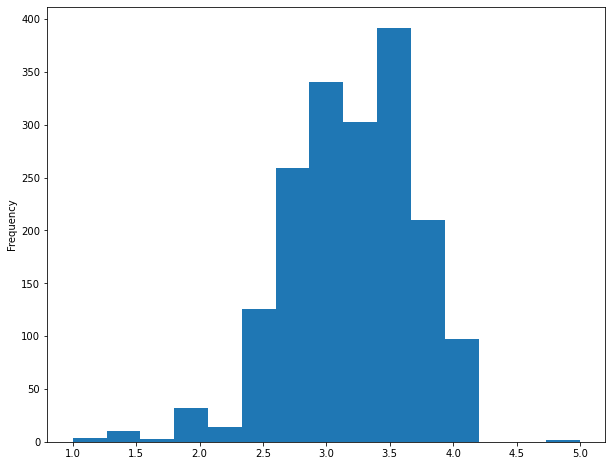

In [13]:
# 초콜릿바 등급의 히스토그램을 그림
# 등급 분포 확인
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
cacao.Rating.plot.hist(ax = ax, bins = 15)

In [14]:
from scipy import stats
stats.kstest(cacao.Rating, cdf='norm')
# 초콜릿바의 등급이 정규분포가 아님을 알 수 있음

KstestResult(statistic=0.9677685518220382, pvalue=0.0)

In [15]:
# 카카오 퍼센트에서 % 기호 빼고 데이터 타입 float으로 변환

cacao.Cocoa_Percent = (
    cacao.Cocoa_Percent
    .str.replace('%', '')
    .astype(float)
)

<AxesSubplot:ylabel='Frequency'>

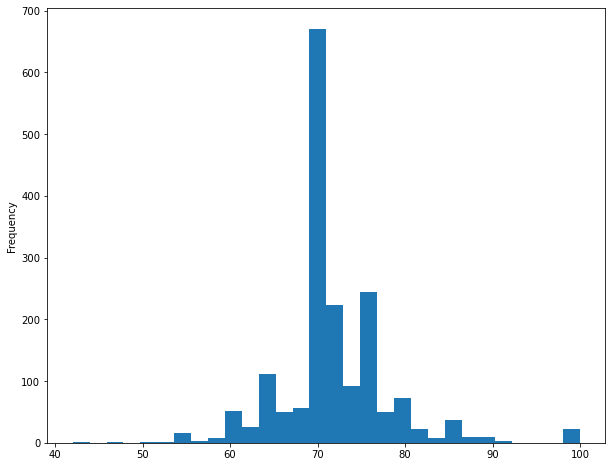

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
cacao.Cocoa_Percent.plot.hist(ax = ax, bins = 30)

In [17]:
# 변수 요소들이 많은 것을 알 수 있음
# 상위 몇 개만 시각화
set(cacao.Company_Location)

{'Amsterdam',
 'Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Bolivia',
 'Brazil',
 'Canada',
 'Chile',
 'Colombia',
 'Costa Rica',
 'Czech Republic',
 'Denmark',
 'Domincan Republic',
 'Ecuador',
 'Eucador',
 'Fiji',
 'Finland',
 'France',
 'Germany',
 'Ghana',
 'Grenada',
 'Guatemala',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Lithuania',
 'Madagascar',
 'Martinique',
 'Mexico',
 'Netherlands',
 'New Zealand',
 'Niacragua',
 'Nicaragua',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Puerto Rico',
 'Russia',
 'Sao Tome',
 'Scotland',
 'Singapore',
 'South Africa',
 'South Korea',
 'Spain',
 'St. Lucia',
 'Suriname',
 'Sweden',
 'Switzerland',
 'U.K.',
 'U.S.A.',
 'Venezuela',
 'Vietnam',
 'Wales'}

In [26]:
# 연도별 가장 등급이 높은 초콜릿바
(
    cacao[['Review_Date', 'Rating', "Company","Company_Location"]]
    .sort_values(['Review_Date', 'Rating'], ascending=[True, False])
    .drop_duplicates(subset='Review_Date')
)

,Review_Date,Rating,Company,Company_Location
86,2006,5.00,Amedei,Italy
78,2007,5.00,Amedei,Italy
239,2008,4.00,Bonnat,France
315,2009,4.00,Cacao Sampaka,Spain
56,2010,4.00,Amano,U.S.A.
54,2011,4.00,Amano,U.S.A.
502,2012,4.00,Danta,Guatemala
17,2013,4.00,A. Morin,France
9,2014,4.00,A. Morin,France
117,2015,4.00,Arete,U.S.A.


<AxesSubplot:xlabel='count', ylabel='Company'>

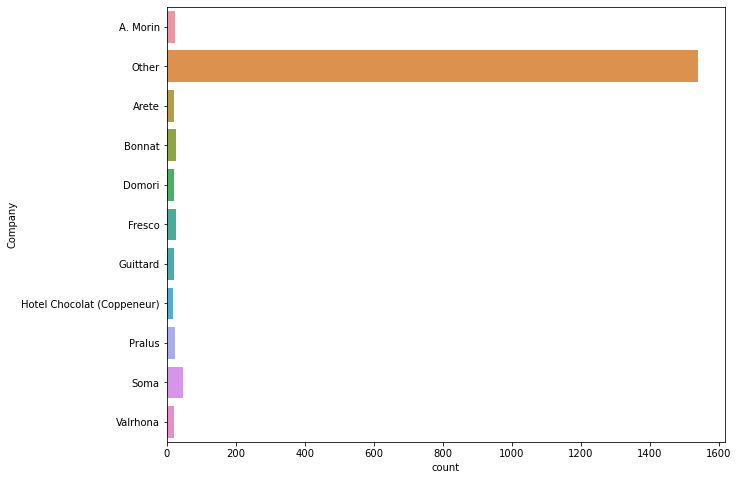

In [487]:
# 초콜릿을 가장 많이 만드는 회사(top10가 아닌 회사는 other로 분류)
# other이 너무 많아서 시각화가 잘 되지 않음

import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(y='Company',
              data=(cacao.assign(
                  Company=cacao.Company.where(cacao.Company.isin(top_10_company), 'Other'))
                   )
             )

In [488]:
# 초콜릿 등급이 3보다 높은 것만

rating = (cacao.Rating > 3)
rating_3 = cacao[rating]
rating_3.head()

,Company,Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Broad_Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,Sao Tome
3,A. Morin,Akata,1680,2015,70.0,France,3.50,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,Peru
6,A. Morin,Cuba,1315,2014,70.0,France,3.50,Cuba
7,A. Morin,Sur del Lago,1315,2014,70.0,France,3.50,Venezuela


In [494]:
top_6_company_CL = cacao.Company_Location.value_counts().index[:6]
top_6_company_CL

Index(['U.S.A.', 'France', 'Canada', 'U.K.', 'Italy', 'Ecuador'], dtype='object')

In [495]:
 cacao.Company_Location.value_counts()

U.S.A.               763
France               156
Canada               124
U.K.                  96
Italy                 63
Ecuador               54
Australia             49
Belgium               40
Switzerland           38
Germany               35
Austria               26
Spain                 25
Colombia              23
Hungary               22
Venezuela             20
Japan                 17
New Zealand           17
Brazil                17
Peru                  17
Madagascar            17
Denmark               15
Vietnam               11
Guatemala             10
Scotland              10
Costa Rica             9
Argentina              9
Israel                 9
Poland                 8
Lithuania              6
Honduras               6
South Korea            5
Sweden                 5
Nicaragua              5
Domincan Republic      5
Ireland                4
Netherlands            4
Puerto Rico            4
Mexico                 4
Sao Tome               4
Amsterdam              4


<AxesSubplot:xlabel='count', ylabel='Company_Location'>

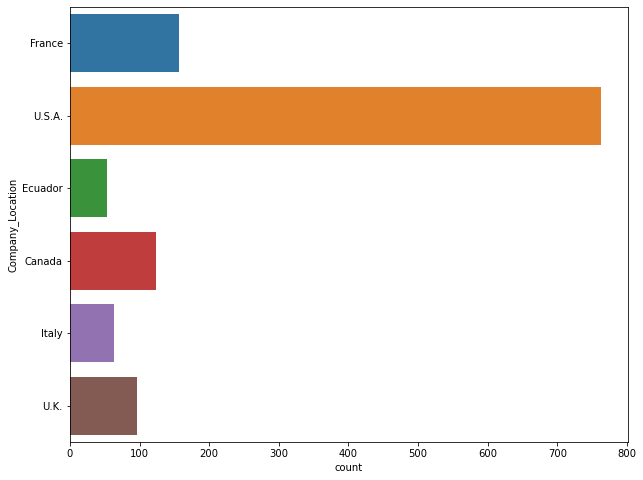

In [496]:
# 초콜릿을 만드는 회사의 위치는 U.S.A가 가장 많은 것을 알 수 있음

import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(y='Company_Location',
              data=(cacao.assign(
                  Company_Location=cacao.Company_Location.where(cacao.Company_Location.isin(top_6_company_CL)))))

In [497]:
# 평점 3이상(만족스러움)인 초콜릿바를 생산한 top6위 회사들
top_6_Rating3_CL = rating_3.Company_Location.value_counts().index[:6]
top_6_Rating3_CL

Index(['U.S.A.', 'France', 'Canada', 'U.K.', 'Italy', 'Australia'], dtype='object')

<AxesSubplot:xlabel='count', ylabel='Company_Location'>

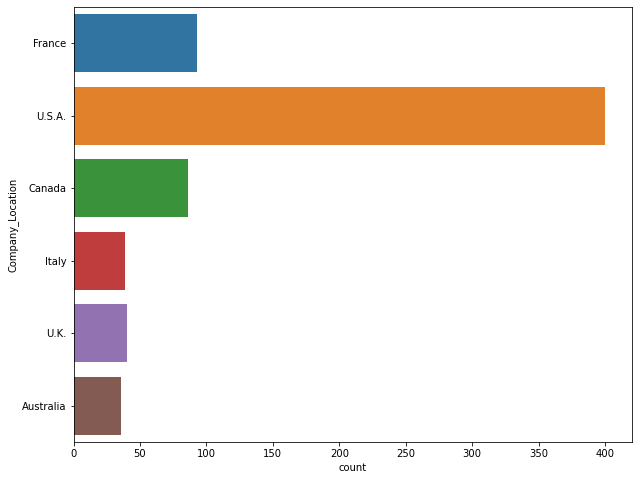

In [498]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(y='Company_Location',
              data=(rating_3.assign(
                  Company_Location=rating_3.Company_Location.where(rating_3.Company_Location.isin(top_6_Rating3_CL)))))

In [499]:
# 초콜릿을 많이 만드는 회사 top10

top_10_company = cacao.Company.value_counts().index[:10]
top_10_company

Index(['Soma', 'Bonnat', 'Fresco', 'Pralus', 'A. Morin', 'Arete', 'Guittard',
       'Domori', 'Valrhona', 'Hotel Chocolat (Coppeneur)'],
      dtype='object')

<AxesSubplot:xlabel='count', ylabel='Company'>

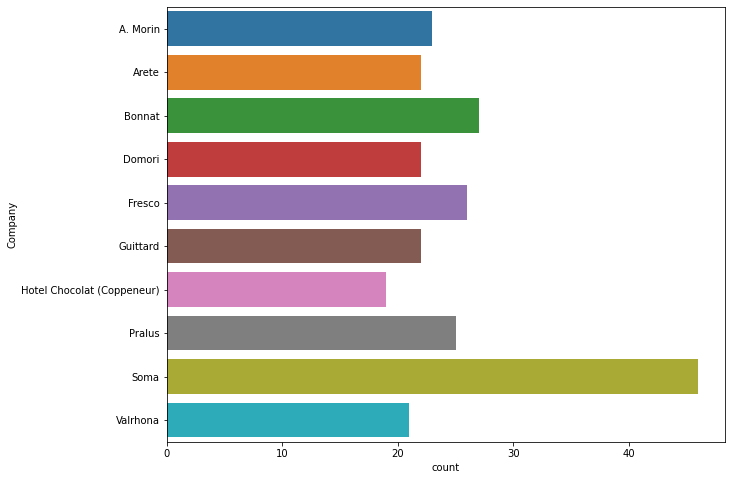

In [500]:
# 초콜릿을 많이 만드는 회사 top10. soma가 가장 많다는 것을 알 수 있음

import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(y='Company',
              data=(cacao.assign(
                  Company=cacao.Company.where(cacao.Company.isin(top_10_company)))
                   )
             )

In [435]:
# 평점 3이상(만족스러움)인 초콜릿바를 생산한 top10위 회사들
top_10_Rating3_C = rating_3.Company.value_counts().index[:10]
top_10_Rating3_C

Index(['Soma', 'Bonnat', 'Fresco', 'Pralus', 'Domori', 'Arete', 'A. Morin',
       'Guittard', 'Valrhona', 'Zotter'],
      dtype='object')

<AxesSubplot:xlabel='count', ylabel='Company'>

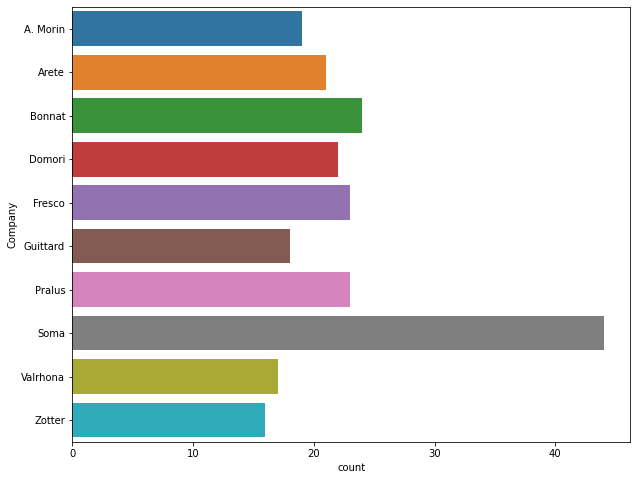

In [438]:
# 평점 3이상(만족스러움)인 초콜릿바를 생산한 top10위 회사들. 일부 회사가 바뀌었다.

fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(y='Company',
              data=(rating_3.assign(
                  Company=rating_3.Company.where(rating_3.Company.isin(top_10_Rating3_C)))))